# Dummy Data Creation

In [6]:
#libraries  
import numpy as np  
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [7]:
#creating placeholder for training data
train_labels=[]
train_samples=[]

In [8]:
#creating placeholder for testing data
test_labels=[]
test_samples=[]

# Data Description
we create a dummy data of having side efeects of a drug on where the population is categorized into 2 categories (young,old). The data is 
balanced having 50 to 50 ratio.

In [9]:
for i in range(100):
    train_samples.append(randint(13,64))
    train_labels.append((1))
    train_samples.append(randint(65,100))
    train_labels.append(0)
for i in range(1000):
    train_samples.append(randint(13,64))
    train_labels.append(0)
    train_samples.append(randint(65,100))
    train_labels.append(1)

In [10]:
for i in range(10):
    test_samples.append(randint(13,64))
    test_labels.append((1))
    test_samples.append(randint(65,100))
    test_labels.append(0)
for i in range(200):
    test_samples.append(randint(13,64))
    test_labels.append(0)
    test_samples.append(randint(65,100))
    test_labels.append(1)

# Data Preprocessing

In [11]:
train_samples=np.array(train_samples)
train_labels=np.array(train_labels)
train_samples,train_labels=shuffle(train_samples,train_labels)

In [12]:
test_samples=np.array(test_samples)
test_labels=np.array(test_labels)
test_samples,test_labels=shuffle(test_samples,test_labels)

In [13]:
# normalizing the input
# scaler.fit_transform() doesnt except one dimensional input or vector
scaler= MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [14]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

In [15]:
scaled_test_samples.shape

(420, 1)

# Simple tf.keras Sequential Model

In [1]:
#libraries required to make model
import tensorflow as tf   
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print(" Number of GPUs Available: ",len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

 Number of GPUs Available:  1


In [23]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2264948242597004508
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18094696775599913226
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
ann_simple=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [4]:
ann_simple.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [5]:
ann_simple.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
ann_simple.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,verbose=2)

Epoch 1/30


InternalError:  Blas GEMM launch failed : a.shape=(10, 1), b.shape=(1, 16), m=10, n=16, k=1
	 [[node sequential/dense/MatMul (defined at <ipython-input-16-c37bea11fc78>:1) ]] [Op:__inference_train_function_647]

Function call stack:
train_function


# Predict

In [25]:
predictions=ann_simple.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [26]:
print(predictions[0:10])

[[0.09878434 0.9012156 ]
 [0.9576604  0.04233958]
 [0.9576604  0.04233958]
 [0.08630725 0.9136928 ]
 [0.9576604  0.04233958]
 [0.9144588  0.08554117]
 [0.9576604  0.04233958]
 [0.08061808 0.9193819 ]
 [0.07771679 0.92228323]
 [0.9576604  0.04233958]]


In [28]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [29]:
print(rounded_predictions[0:10])

[1 0 0 1 0 0 0 1 1 0]


# Evaluation of ANN

Confusion matrix

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
data = {'y_Actual': test_labels,
        'y_Predicted': rounded_predictions
        }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

In [38]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

In [39]:
confusion_matrix

Predicted,0,1
Actual,,
0,201,9
1,13,197


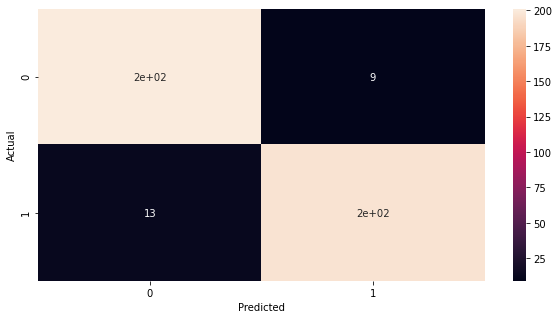

In [40]:
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# model save()

In [43]:
import os.path
if os.path.isfile('D:/datasetcollection/models/ann_simple.h5') is False:
    ann_simple.save('D:/datasetcollection/ann_simple.h5')

In [44]:
from tensorflow.keras.models import load_model
new_model=load_model('D:/datasetcollection/ann_simple.h5')

In [45]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [47]:
#new_model.get_weights()